**Goal:** In this project, I'll be building a machine learning model that will be able to the feedback of customers about the quality of their food based on the data features.

# **Import data**

In [1]:
import pandas as pd
data = pd.read_csv("D:/Dataset/OnlineFood_dataset/onlinefoods.csv")

# **Data Processing**

In [2]:
data.shape

(388, 13)

In [3]:
data.head(5)

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes


**Demographic Information:**


Age: Age of the customer.

Gender: Gender of the customer.

Marital Status: Marital status of the customer.

Occupation: Occupation of the customer.

Monthly Income: Monthly income of the customer.

Educational Qualifications: Educational qualifications of the customer.

Family Size: Number of individuals in the customer's family.


**Location Information:**


Latitude: Latitude of the customer's location.

Longitude: Longitude of the customer's location.

Pin Code: Pin code of the customer's location.


**Order Details:**


Output: Current status of the order (e.g., pending, confirmed, delivered).

Feedback: Feedback provided by the customer after receiving the order.

**Check for missing data**

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         388 non-null    int64  
 1   Gender                      388 non-null    object 
 2   Marital Status              388 non-null    object 
 3   Occupation                  388 non-null    object 
 4   Monthly Income              388 non-null    object 
 5   Educational Qualifications  388 non-null    object 
 6   Family size                 388 non-null    int64  
 7   latitude                    388 non-null    float64
 8   longitude                   388 non-null    float64
 9   Pin code                    388 non-null    int64  
 10  Output                      388 non-null    object 
 11  Feedback                    388 non-null    object 
 12  Unnamed: 12                 388 non-null    object 
dtypes: float64(2), int64(3), object(8)


**Demographic Information**

In [5]:
# Demographic information
print(data['Age'].value_counts())
print('------------------')
print(data['Gender'].value_counts())
print('------------------')
print(data['Marital Status'].value_counts())
print('------------------')
print(data['Occupation'].value_counts())
print('------------------')
print(data['Monthly Income'].value_counts())
print('------------------')
print(data['Educational Qualifications'].value_counts())
print('------------------')
print(data['Family size'].value_counts())

Age
23    73
22    57
25    52
24    50
26    35
21    23
27    21
32    16
28    15
29    14
20     9
30     9
31     8
19     4
18     1
33     1
Name: count, dtype: int64
------------------
Gender
Male      222
Female    166
Name: count, dtype: int64
------------------
Marital Status
Single               268
Married              108
Prefer not to say     12
Name: count, dtype: int64
------------------
Occupation
Student           207
Employee          118
Self Employeed     54
House wife          9
Name: count, dtype: int64
------------------
Monthly Income
No Income          187
25001 to 50000      69
More than 50000     62
10001 to 25000      45
Below Rs.10000      25
Name: count, dtype: int64
------------------
Educational Qualifications
Graduate         177
Post Graduate    174
Ph.D              23
School            12
Uneducated         2
Name: count, dtype: int64
------------------
Family size
3    117
2    101
4     63
5     54
6     29
1     24
Name: count, dtype: int64


# **Categorical encoding**

In [6]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

# Data normalization
num_pipeline = Pipeline([
        ("scaler", StandardScaler())
    ])

# Categorical Encoding
cat_pipeline = Pipeline([
        ("ordinal_encoder", OrdinalEncoder()), 
        ("cat_encoder", OneHotEncoder(sparse_output=False)),
    ])

num_attribs = ["Age", "Family size", "latitude", "longitude", "Pin code"]
cat_attribs = ["Gender", "Marital Status", "Occupation", "Monthly Income", "Educational Qualifications", "Output", "Unnamed: 12"]

preprocess_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", cat_pipeline, cat_attribs),
    ])

# **Prediction Model**

In [7]:
from sklearn.model_selection import train_test_split

X = preprocess_pipeline.fit_transform(data.drop(['Feedback'], axis=1))
y = data['Feedback']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)


In [8]:
#import random forest classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rf_clf = RandomForestClassifier(random_state=42)
cv_score = cross_val_score(rf_clf , X_train, y_train, cv=3)
cv_score.mean()
print(f"Cross-validation accuracy: {cv_score.mean():.2%}")

Cross-validation accuracy: 84.48%


In [9]:
from sklearn.metrics import precision_score, recall_score, f1_score

rf_clf.fit(X_train, y_train)
y_pred = rf_clf.predict(X_test)

precision = precision_score(y_test, y_pred, pos_label='Positive')
recall = recall_score(y_test, y_pred, pos_label='Positive')
f1 = f1_score(y_test, y_pred, pos_label='Positive')

print(f"Precision: {precision:.2%}")
print(f"Recall: {recall:.2%}")
print(f"F1 Score: {f1:.2%}")

Precision: 90.91%
Recall: 94.49%
F1 Score: 92.66%


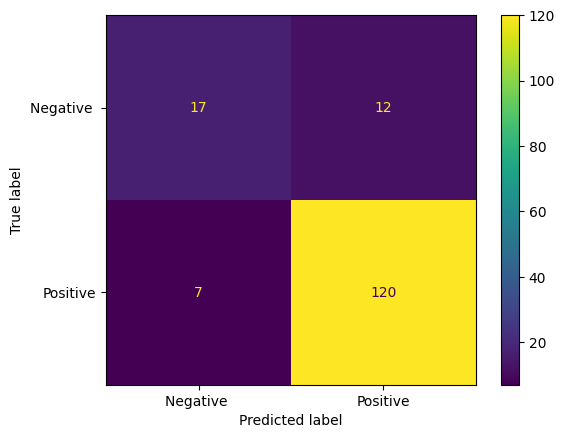

In [10]:
# plot model performance
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

ConfusionMatrixDisplay.from_estimator(rf_clf, X_test, y_test)
plt.show()

In [11]:
data['Feedback'].value_counts()

Feedback
Positive     317
Negative      71
Name: count, dtype: int64


**Note**: The dataset is imbalanced, consisting of 317 instances with positive feedback and only 71 instances with negative feedback. When splitting the data into training and testing sets, this imbalance can lead to the model performing better on the class with more instances (positive feedback) and poorly on the class with fewer instances (negative feedback).